In [5]:
#The first step requires to upload the data on Goodle Drive, so it can be loaded from the drive - and not the local drive. 
#To do so it is needed to install GDOWN
!pip install gdown

In [6]:
#I am giving the location of the drive (url), the output and the command that downloads the dataset
import gdown

url = 'https://drive.google.com/uc?id=18yqPPoir-ViLIxxNCXMArTK1qegsvbLJ'
output = 'MarineLitter.gpkg'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=18yqPPoir-ViLIxxNCXMArTK1qegsvbLJ
To: C:\Users\Noemi\Downloads\MarineLitter.gpkg
100%|██████████| 48.8M/48.8M [00:01<00:00, 25.0MB/s]


'MarineLitter.gpkg'

In [7]:
#installing the required libraries
!pip install geopandas folium

In [8]:
import geopandas as gpd

#Loading the dataset
gdf = gpd.read_file('MarineLitter.gpkg')

#Checking the first few rows 
gdf.head()

,OBJECTID,beachSiteIdentifier,lat,lon,avgLitterItemsPer100mBeach,geometry
0,1,8.0,32.6416,-16.9572,22.16,POINT (1812901.281 1510125.460)
1,2,11.0,28.4014,-16.9195,64.00,POINT (1684534.290 1062477.184)
2,3,17.0,28.0496,-16.7190,66.00,POINT (1692863.756 1018748.310)
3,4,18.0,28.4141,-16.5589,0.15,POINT (1718720.018 1051746.988)
4,5,20.0,28.3799,-16.3598,1049.00,POINT (1736404.585 1041553.446)


In [9]:
!pip install gdal
#installing GDAL, used for a wide range of geospatial processing tasks

In [23]:
#checking validity
from osgeo import ogr

file_path = 'MarineLitter.gpkg'

#Open the file using GDAL
ds = ogr.Open(file_path)
if ds is None:
    print(f"ERROR: Cannot open '{file_path}'. This might not be a valid Geopackage file.")
else:
    print(f"'{file_path}' is a valid file. Number of layers: {ds.GetLayerCount()}")
    ds = None

'MarineLitter.gpkg' is a valid file. Number of layers: 2


In [12]:
import geopandas as gpd
import gdown


url = 'https://drive.google.com/uc?id=18yqPPoir-ViLIxxNCXMArTK1qegsvbLJ'
output = 'Marinelitter.gpkg'
gdown.download(url, output, quiet=False)

#reading the file with geopandas
gdf = gpd.read_file(output)

Downloading...
From: https://drive.google.com/uc?id=18yqPPoir-ViLIxxNCXMArTK1qegsvbLJ
To: C:\Users\Noemi\Downloads\Marinelitter.gpkg
100%|██████████| 48.8M/48.8M [00:03<00:00, 14.9MB/s]


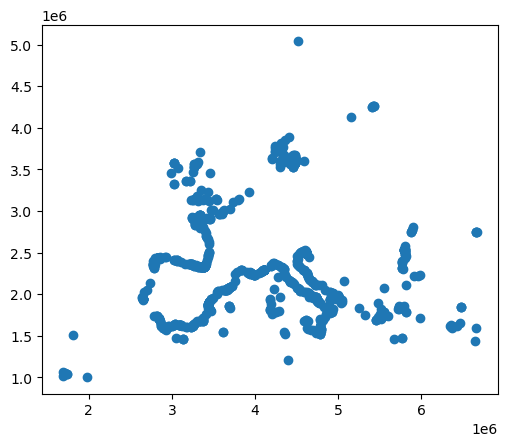

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

#Basic plot with GeoPandas
gdf.plot()

#display this plot in a Jupyter notebook
plt.show()

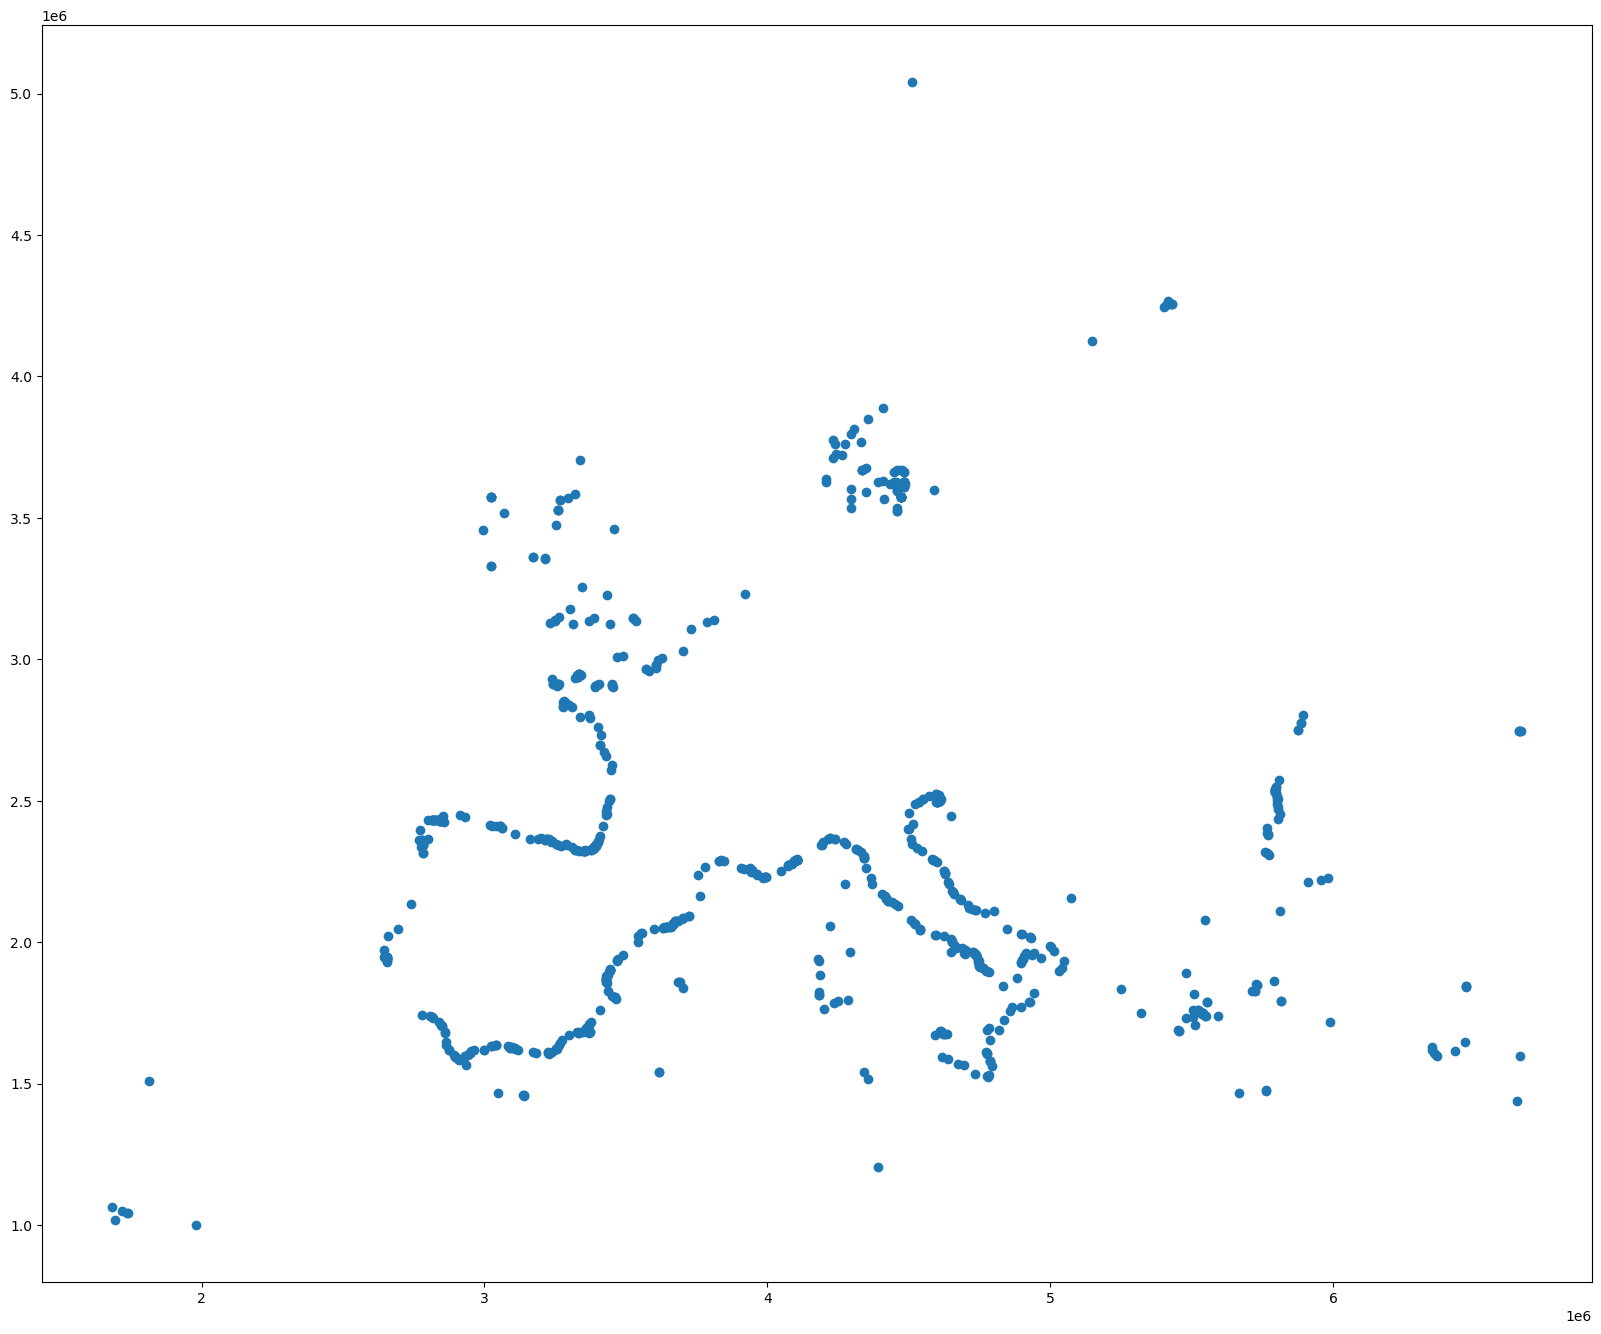

In [14]:
#A more decorated plot with customization
gdf.plot(figsize=(20, 20), legend=True, categorical=True)

#Show the decorated plot
plt.show()

In [15]:
import folium

#Creating a folium map object snd centering it by averaging your latitude and longitude
m = folium.Map(location=[gdf['lat'].mean(), gdf['lon'].mean()], zoom_start=3)

#Looping through the data and create a marker for each point
for index, row in gdf.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lon']),
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

#Displaying the map
m

In [16]:
import folium

#I want to show the data only in Denmark and display the litter with interactive popups. Defineing the bounding box of Denmark:
#the format will be: [min latitude, min longitude, max latitude, max longitude]
denmark_bounds = [54.5, 8, 57.75, 15]

#Creating a folium map object centered on Denmark
m = folium.Map(location=[(denmark_bounds[0] + denmark_bounds[2]) / 2, 
                         (denmark_bounds[1] + denmark_bounds[3]) / 2], 
               zoom_start=6)

#Filtering the data to just the points within Denmark's bounding box
denmark_data = gdf[(gdf['lat'] >= denmark_bounds[0]) & (gdf['lat'] <= denmark_bounds[2]) &
                   (gdf['lon'] >= denmark_bounds[1]) & (gdf['lon'] <= denmark_bounds[3])]

#Adding the filtered points to the map + popups.
for idx, row in denmark_data.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=str(row['beachSiteIdentifier'])).add_to(m)

#Showing the map
m

In [17]:
import folium
from folium.plugins import HeatMap
#drung this step a heatnap will be created from the quantity of Maritime litter.

#Creating a list of coordinates and associated weights (litter quantities)
heat_data = [[row['lat'], row['lon'], row['avgLitterItemsPer100mBeach']] for index, row in denmark_data.iterrows()]

#Creating a map centered around Denmark
m = folium.Map(location=[denmark_data['lat'].mean(), denmark_data['lon'].mean()], zoom_start=7)

#Add the heatmap layer to the map
HeatMap(heat_data).add_to(m)

m

In [18]:
from folium import LayerControl

#Adding the Layer Control to toggle layers - did not change much but with more layer it could be useful.
LayerControl().add_to(m)

m

In [19]:
#Now installing seabord to create some graphs
!pip install seaborn

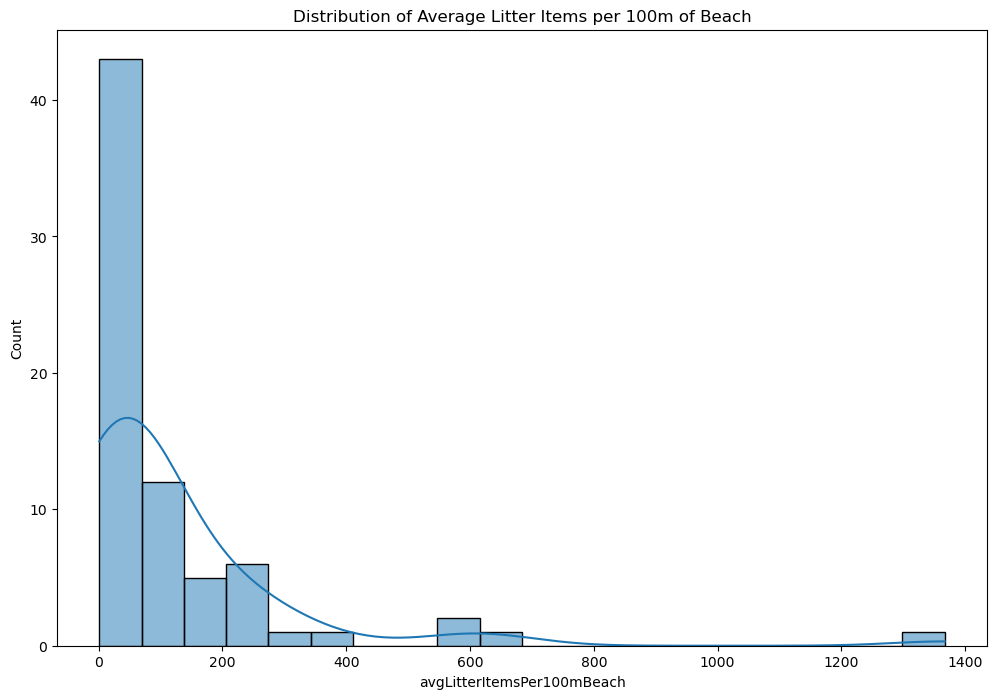

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

#For the dataset, the choice was to display a "Distribution Plot": it visualizes the distribution of data and its probability density
plt.figure(figsize=(12, 8))
sns.histplot(denmark_data['avgLitterItemsPer100mBeach'], bins=20, kde=True)
plt.title('Distribution of Average Litter Items per 100m of Beach')
plt.show()